# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Resources used:
# openweathermap.org
# https://www.geeksforgeeks.org/python-find-current-weather-of-any-city-using-openweathermap-api/
# 
# 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [4]:
# To show the cities being pulled in - for my own use.
print(cities)

['cabo san lucas', 'hermanus', 'japura', 'narsaq', 'fare', 'new norfolk', 'flin flon', 'atuona', 'viedma', 'bluff', 'torbay', 'buctzotz', 'upernavik', 'rikitea', 'belushya guba', 'taolanaro', 'salalah', 'port hardy', 'port pirie', 'illoqqortoormiut', 'chagda', 'san agustin', 'ushuaia', 'dikson', 'sadon', 'tasiilaq', 'sao joao da barra', 'albany', 'talnakh', 'broome', 'ishigaki', 'esperance', 'timmins', 'tiznit', 'aykhal', 'jamestown', 'barrow', 'hilo', 'ribeira grande', 'amderma', 'puerto leguizamo', 'punta arenas', 'port elizabeth', 'coihueco', 'poya', 'brae', 'arraial do cabo', 'cidreira', 'kruisfontein', 'mataura', 'chuy', 'portland', 'qui nhon', 'taltal', 'orcopampa', 'petropavlovsk-kamchatskiy', 'faanui', 'lebu', 'qaanaaq', 'mecca', 'abu samrah', 'nyurba', 'guerrero negro', 'merritt island', 'leningradskiy', 'tiksi', 'port lincoln', 'longyearbyen', 'bellevue', 'college', 'cape town', 'panaba', 'havelock', 'busselton', 'bredasdorp', 'belyy yar', 'eldorado', 'rawson', 'traralgon', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# To call in and print the response to have the set-up of the data - for my own use.
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = url + "appid=" + api_key + "&q=" + city

cloudiness_response = requests.get(query_url).json()

cloudiness_response

{'coord': {'lon': 21.26, 'lat': -28.45},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 290.15,
  'feels_like': 290.21,
  'temp_min': 290.15,
  'temp_max': 290.15,
  'pressure': 1017,
  'humidity': 93},
 'wind': {'speed': 2.67, 'deg': 315},
 'clouds': {'all': 31},
 'dt': 1583117252,
 'sys': {'type': 1,
  'id': 1990,
  'country': 'ZA',
  'sunrise': 1583123282,
  'sunset': 1583168784},
 'timezone': 7200,
 'id': 945945,
 'name': 'Upington',
 'cod': 200}

In [15]:
# From geeksforgeeks.org to verify the data being pulled in matches my expectations of a known city -for my own use.

url = "http://api.openweathermap.org/data/2.5/weather?"
town = "cabo san lucas"

query_url = url + "appid=" + api_key + "&q=" + town

response = requests.get(query_url) 
x = response.json() 
  
# Now x contains list of nested dictionaries 
# Check the value of "cod" key is equal to 
# "404", means city is found otherwise, 
# city is not found 
if x["cod"] != "404": 
  
    # store the value of "main" 
    # key in variable y 
    y = x["main"] 
  
    # store the value corresponding 
    # to the "temp" key of y 
    current_temperature = y["temp"] 
  
    # store the value corresponding 
    # to the "pressure" key of y 
    current_pressure = y["pressure"] 
  
    # store the value corresponding 
    # to the "humidity" key of y 
    current_humidiy = y["humidity"] 
  
    # store the value of "weather" 
    # key in variable z 
    z = x["weather"] 
  
    # store the value corresponding  
    # to the "description" key at  
    # the 0th index of z 
    weather_description = z[0]["description"] 
  
    # print following values 
    print(" Temperature (in kelvin unit) = " +
                    str(current_temperature) + 
          "\n atmospheric pressure (in hPa unit) = " +
                    str(current_pressure) +
          "\n humidity (in percentage) = " +
                    str(current_humidiy) +
          "\n description = " +
                    str(weather_description)) 
  
else: 
    print(" City Not Found ") 

 Temperature (in kelvin unit) = 276.15
 atmospheric pressure (in hPa unit) = 992
 humidity (in percentage) = 74
 description = overcast clouds


In [30]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&q="

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_name = []

print("Beginning Data Retrival \n-----------------------------")

for x in range(len(cities)):
    try:
        print(f"Processing record {x} of Set 1 | {cities[x]}")

        city_logs = requests.get(query_url + cities[x]).json
    
    except:
        print("City not found... Skipping.")
        
        city_logs

Beginning Data Retrival 
-----------------------------
Processing record 0 of Set 1 | cabo san lucas
Processing record 1 of Set 1 | hermanus
Processing record 2 of Set 1 | japura
Processing record 3 of Set 1 | narsaq
Processing record 4 of Set 1 | fare
Processing record 5 of Set 1 | new norfolk
Processing record 6 of Set 1 | flin flon
Processing record 7 of Set 1 | atuona
Processing record 8 of Set 1 | viedma
Processing record 9 of Set 1 | bluff
Processing record 10 of Set 1 | torbay
Processing record 11 of Set 1 | buctzotz
Processing record 12 of Set 1 | upernavik
Processing record 13 of Set 1 | rikitea
Processing record 14 of Set 1 | belushya guba
Processing record 15 of Set 1 | taolanaro
Processing record 16 of Set 1 | salalah
Processing record 17 of Set 1 | port hardy
Processing record 18 of Set 1 | port pirie
Processing record 19 of Set 1 | illoqqortoormiut
Processing record 20 of Set 1 | chagda
Processing record 21 of Set 1 | san agustin
Processing record 22 of Set 1 | ushuaia
Pr

Processing record 197 of Set 1 | constitucion
Processing record 198 of Set 1 | tambul
Processing record 199 of Set 1 | qaqortoq
Processing record 200 of Set 1 | nelson bay
Processing record 201 of Set 1 | bonavista
Processing record 202 of Set 1 | mapiripan
Processing record 203 of Set 1 | tuatapere
Processing record 204 of Set 1 | michigan city
Processing record 205 of Set 1 | thessalon
Processing record 206 of Set 1 | maningrida
Processing record 207 of Set 1 | comodoro rivadavia
Processing record 208 of Set 1 | nizhneyansk
Processing record 209 of Set 1 | ati
Processing record 210 of Set 1 | mehamn
Processing record 211 of Set 1 | mabaruma
Processing record 212 of Set 1 | ugoofaaru
Processing record 213 of Set 1 | fairbanks
Processing record 214 of Set 1 | alta floresta
Processing record 215 of Set 1 | zhuhai
Processing record 216 of Set 1 | uglich
Processing record 217 of Set 1 | twentynine palms
Processing record 218 of Set 1 | tidore
Processing record 219 of Set 1 | makakilo city

Processing record 393 of Set 1 | jaora
Processing record 394 of Set 1 | sorrento
Processing record 395 of Set 1 | elwood
Processing record 396 of Set 1 | pizarro
Processing record 397 of Set 1 | aulla
Processing record 398 of Set 1 | ambovombe
Processing record 399 of Set 1 | menongue
Processing record 400 of Set 1 | sur
Processing record 401 of Set 1 | puerto lempira
Processing record 402 of Set 1 | paamiut
Processing record 403 of Set 1 | alofi
Processing record 404 of Set 1 | camacha
Processing record 405 of Set 1 | harihar
Processing record 406 of Set 1 | moerai
Processing record 407 of Set 1 | nanortalik
Processing record 408 of Set 1 | mission
Processing record 409 of Set 1 | viisoara
Processing record 410 of Set 1 | saint marys
Processing record 411 of Set 1 | bilma
Processing record 412 of Set 1 | floresta
Processing record 413 of Set 1 | milos
Processing record 414 of Set 1 | sikonge
Processing record 415 of Set 1 | gurgan
Processing record 416 of Set 1 | safaga
Processing rec

Processing record 588 of Set 1 | hazorasp
Processing record 589 of Set 1 | eyl
Processing record 590 of Set 1 | pemba
Processing record 591 of Set 1 | raudeberg
Processing record 592 of Set 1 | souillac
Processing record 593 of Set 1 | hvolsvollur
Processing record 594 of Set 1 | mandera
Processing record 595 of Set 1 | lundazi
Processing record 596 of Set 1 | celestun
Processing record 597 of Set 1 | kolda
Processing record 598 of Set 1 | golfito
Processing record 599 of Set 1 | ust-nera
Processing record 600 of Set 1 | ozernovskiy
Processing record 601 of Set 1 | corbelia
Processing record 602 of Set 1 | kaitangata
Processing record 603 of Set 1 | luena
Processing record 604 of Set 1 | nortelandia
Processing record 605 of Set 1 | oberwil
Processing record 606 of Set 1 | necochea
Processing record 607 of Set 1 | sinnamary
Processing record 608 of Set 1 | goderich
Processing record 609 of Set 1 | rehnan
Processing record 610 of Set 1 | evensk
Processing record 611 of Set 1 | afgoye
Pro

In [32]:

url = "http://api.openweathermap.org/data/2.5/weather?"

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
city_name = []

print("Beginning Data Retrival \n-----------------------------")

for x in range(len(cities)):
    try:     
        print(f"Processing Record {x + 1} | {cities[x]}")
        query_url = url + "appid=" + api_key + "&q=" + cities[x]
        weather_response = requests.get(query_url).json()
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name.append(weather_response["name"])
    except:
        print("City not found. Skipping...")

Beginning Data Retrival 
-----------------------------
Processing Record 1 | cabo san lucas
Processing Record 2 | hermanus
Processing Record 3 | japura
Processing Record 4 | narsaq
Processing Record 5 | fare
Processing Record 6 | new norfolk
Processing Record 7 | flin flon
Processing Record 8 | atuona
Processing Record 9 | viedma
Processing Record 10 | bluff
Processing Record 11 | torbay
Processing Record 12 | buctzotz
Processing Record 13 | upernavik
Processing Record 14 | rikitea
Processing Record 15 | belushya guba
City not found. Skipping...
Processing Record 16 | taolanaro
City not found. Skipping...
Processing Record 17 | salalah
Processing Record 18 | port hardy
Processing Record 19 | port pirie
Processing Record 20 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 | chagda
City not found. Skipping...
Processing Record 22 | san agustin
Processing Record 23 | ushuaia
Processing Record 24 | dikson
Processing Record 25 | sadon
Processing Record 26 | tasiilaq
Proce

Processing Record 231 | provideniya
Processing Record 232 | lavrentiya
Processing Record 233 | haibowan
City not found. Skipping...
Processing Record 234 | lagoa vermelha
Processing Record 235 | rach gia
Processing Record 236 | huarmey
Processing Record 237 | maxixe
Processing Record 238 | sorvag
City not found. Skipping...
Processing Record 239 | coihaique
Processing Record 240 | labuhan
Processing Record 241 | yamada
Processing Record 242 | hofn
Processing Record 243 | kuche
City not found. Skipping...
Processing Record 244 | attawapiskat
City not found. Skipping...
Processing Record 245 | fortuna
Processing Record 246 | nakasongola
Processing Record 247 | fukue
Processing Record 248 | natal
Processing Record 249 | marystown
Processing Record 250 | komsomolskiy
Processing Record 251 | ancud
Processing Record 252 | otradnoye
Processing Record 253 | mount gambier
Processing Record 254 | ausa
Processing Record 255 | daru
Processing Record 256 | yar-sale
Processing Record 257 | saldanha


Processing Record 468 | mount isa
Processing Record 469 | la romana
Processing Record 470 | tarudant
City not found. Skipping...
Processing Record 471 | marzuq
Processing Record 472 | chicama
Processing Record 473 | maromitsa
Processing Record 474 | zhangjiakou
Processing Record 475 | pochutla
Processing Record 476 | louis trichardt
Processing Record 477 | olavarria
Processing Record 478 | osmanabad
Processing Record 479 | krasnovishersk
Processing Record 480 | tilichiki
Processing Record 481 | marfino
Processing Record 482 | barroualie
City not found. Skipping...
Processing Record 483 | mishan
Processing Record 484 | bambanglipuro
Processing Record 485 | high prairie
Processing Record 486 | longavi
Processing Record 487 | sakaiminato
Processing Record 488 | tautira
Processing Record 489 | brezova pod bradlom
Processing Record 490 | farmington
Processing Record 491 | aranos
Processing Record 492 | candido mendes
Processing Record 493 | qasigiannguit
Processing Record 494 | egvekinot
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
weather_df = pd.DataFrame({"City" : city_name, "Cloudiness" : cloudiness, "Country" : country, "Date" : date,
                           "Humidity" : humidity, "Lat" : lat, "Lng" : lng, "Max Temp" : max_temp,
                           "Wind Speed" : wind_speed})
weather_df.to_csv(path_or_buf=output_data_file,index=False,encoding="UTF-8")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,5,MX,1583117643,56,22.89,-109.91,295.15,6.70
1,Hermanus,0,ZA,1583117707,90,-34.42,19.23,292.59,6.55
2,Japura,4,ID,1583117707,60,-0.32,102.35,303.89,1.61
3,Narsaq,0,GL,1583117707,49,60.92,-46.05,256.15,1.00
4,Fare,100,PF,1583117707,76,-16.70,-151.02,301.39,9.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

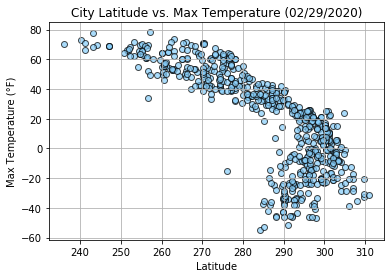

In [34]:
plt.scatter(weather_df["Max Temp"], weather_df["Lat"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 0.7, linewidth = 1)
plt.grid()
plt.title("City Latitude vs. Max Temperature (02/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.savefig("./Images/latvstemp.png")
plt.show()

#### Latitude vs. Humidity Plot

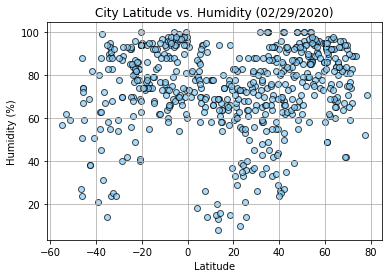

In [35]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 0.7, linewidth = 1)
plt.grid()
plt.title("City Latitude vs. Humidity (02/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/latvshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

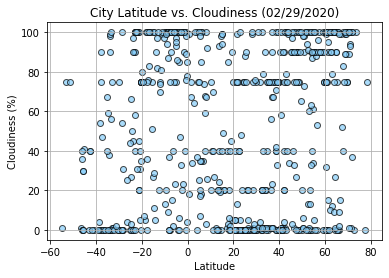

In [36]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 0.7, linewidth = 1)
plt.grid()
plt.title("City Latitude vs. Cloudiness (02/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./Images/latvscloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

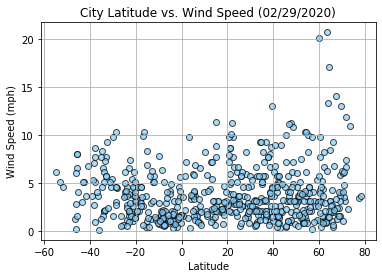

In [37]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors = "lightskyblue", edgecolor="black",
            alpha = 0.7, linewidth = 1)
plt.grid()
plt.title("City Latitude vs. Wind Speed (02/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("./Images/latvswindspeed.png")
plt.show()